# SVL 00 - Python Primer

In [47]:
import numpy as np

## Task 1

Implement a function that creates a dictionary with the following words as keys and each word's length as the key's value:

In [48]:
words = "Implement a function that creates a dictionary with the following words as keys and each word's length as the key's value"

In [49]:
def func(words):
    D = {}
    #TODO
    for word in words.split():
        D[word] = len(word)
        
    # or shorter:   
    # D = {w : len(w) for w in words.split()}
    
    return D

func(words)

{'Implement': 9,
 'a': 1,
 'function': 8,
 'that': 4,
 'creates': 7,
 'dictionary': 10,
 'with': 4,
 'the': 3,
 'following': 9,
 'words': 5,
 'as': 2,
 'keys': 4,
 'and': 3,
 'each': 4,
 "word's": 6,
 'length': 6,
 "key's": 5,
 'value': 5}

# Task 2

Implement a function that computes the Precision and Recall from the following confusion matrix:

In [50]:
C = np.array([[97, 29],[3, 71]]) 
# Assume: 
# rows = predicted classes (row0=positive,row1=negative), 
# cols = true classes (col0=positive, col1=negative)

In [51]:
def precision_recall(conf_mat):
    prec = conf_mat[0,0]/conf_mat[0,:].sum()
    reca = conf_mat[0,0]/conf_mat[:,0].sum()
    
    #TODO
    
    return prec, reca

precision_recall(C)

(0.7698412698412699, 0.97)

# Task 3

Implement the inner product for two matrices $$C^{(k, n)} = A^{(k, m)} * B^{(m, n)}$$ without using numpy:

In [52]:
A = np.array([
     [3, 4, 1], 
     [7, -1, 2]
    ])
B = np.array([
     [-1, 2],
     [7, -2], 
     [0, 3]
    ])

In [53]:
def matmul(A, B):
    
    # TODO
    K = len(A)
    M = len(A[0])
    N = len(B[0])
    
    C = np.zeros((K,K))
    
    for k in range(K):
        for n in range(N):
            for m in range(M):
                C[k,n] += A[k,m] * B[m,n]
    
    return C

matmul(A, B)

array([[ 25.,   1.],
       [-14.,  22.]])

# Task 4

Implement the skeleton of a class 'MyEstimator'. The purpose of the class is to wrap the functionality of an arbitrary supervised learning algorithm. It needs to provide the following interface:
- The constructor must accept a variable number of key-value arguments
- The class must provide a 'fit' method, that accepts a numpy ndarray type named 'X' and another numpy ndarray type named 'y'. The method must return the object it was called on.
- The class must provide a 'predict' method, that accepts a numpy ndarray type named 'X'.

In [54]:
class MyEstimator:
    def __init__(self, **kwargs):  ##arbitrary number of "key-value arguments", stored in dictionary
        self._params = kwargs      ## "_params" is the name of the dictionary/ attribute
        print(kwargs)
        
    def fit(self, X : np.ndarray, Y : np.ndarray):  ##arg:type, specifies accepted type of the parameter (but won´t throw error!)
        return self
    
    def predict(self, X : np.ndarray):
        print(X)
    
m  = MyEstimator(hi = "hi", bye = "bye")
m.predict(A)

{'hi': 'hi', 'bye': 'bye'}
[[ 3  4  1]
 [ 7 -1  2]]


# Task 5: LMS algorithm

In [55]:
import matplotlib.pyplot as plt

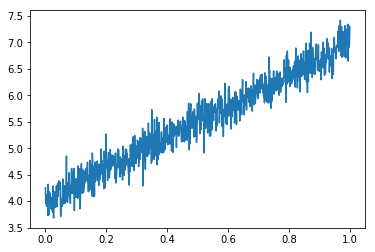

In [56]:
# Dataset
N = 1000
x = np.linspace(0, 1, N)
y = 4 + 3 * x + np.random.normal(0, 0.2, N)
D = [(x[i], y[i]) for i in range(N)]
plt.plot(x, y)

In [66]:
def lms(dataset, eta, my, iter):
    w0, w1 = np.random.normal(0, 0.1, 2)
    
    W = np.array([w0, w1])
    X = np.array([[1,d[0]] for d in dataset])
    Y = np.array([d[1] for d in dataset])
    
    iteration = 0
    
    # TODO: algorithm

    while(iteration < iter):
        iteration += 1
       
        ##go through dataset and adjust weights afeter each point
        
        for i in range(len(dataset)):
            y = X[i] @ W   ##np.matmul(X[i],W)
            error = Y[i] - y
            W = W + 2*my*error*X[i]
        
        ##check the mean squared error
        
        squared_error = 0
        
        for i in range(len(dataset)):
            y = X[i] @ W   
            squared_error += (Y[i] - y)**2
            
        MSE = squared_error / len(dataset)
        
        print(iteration,". MSE: ", MSE)
        
        ##stop if MSE is small enough
        
        if(MSE < eta):
            break
    
    w0 = W[0]
    w1 = W[1]
    
    return w0, w1        

In [67]:
w0, w1 = lms(D, 0.1, 0.01 , 100)

1 . MSE:  1.3528445749355051
2 . MSE:  0.7383519188812852
3 . MSE:  0.4107746337653416
4 . MSE:  0.2363188355351186
5 . MSE:  0.1435353326618259
6 . MSE:  0.0942808233947359


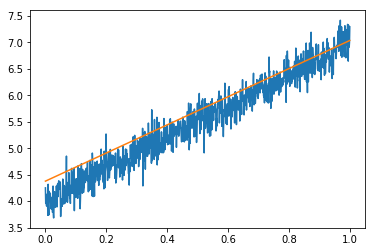

In [68]:
plt.plot(x, y)
plt.plot(x, w0 + x * w1)